In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
session = tf.InteractiveSession()

In [3]:
a = tf.zeros((2,2))
b = tf.ones((2,2))

In [4]:
tf.reduce_sum(b, reduction_indices=1).eval()

array([ 2.,  2.], dtype=float32)

TensorFlow requires explicit evaluation!

In [5]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [6]:
tf.reshape(a, (1,4)).eval()

array([[ 0.,  0.,  0.,  0.]], dtype=float32)

TensorFlow Session Object

In [7]:
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
session.run(c)

30.0

In [8]:
c.eval()

30.0

TensorFlow Variables

In [9]:
W1 = tf.ones((2,2))

In [10]:
W2 = tf.Variable(tf.zeros((2,2)), name="weights")

In [11]:
print(session.run(W1))

[[ 1.  1.]
 [ 1.  1.]]


In [12]:
session.run(tf.global_variables_initializer())
print(session.run(W2))

[[ 0.  0.]
 [ 0.  0.]]


In [13]:
W = tf.Variable(tf.zeros((2,2)), name="weights")

In [14]:
R = tf.Variable(tf.random_normal((2,2)), name="random_weights")

In [15]:
session.run(tf.global_variables_initializer())
print(session.run(W))
print(session.run(R))

[[ 0.  0.]
 [ 0.  0.]]
[[ 1.42004919 -0.02323505]
 [-1.800246    0.43613601]]


Updating Variable State

In [16]:
state = tf.Variable(0, name="counter")

In [17]:
new_value = tf.add(state, tf.constant(1))

In [18]:
update = tf.assign(state, new_value)

In [19]:
session.run(tf.global_variables_initializer())
print(session.run(state))
for _ in range(3):
    session.run(update)
    print(session.run(state))

0
1
2
3


Fetching Variable State

In [20]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.mul(input1, intermed)
result = session.run([mul, intermed])
print(result)

[21.0, 7.0]


Inputting Data

In [21]:
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)
print(session.run(ta))

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


Placeholders and Feed Dictionaries

In [22]:
input1 = tf.placeholder(tf.float32) 
input2 = tf.placeholder(tf.float32) 
output = tf.mul(input1, input2) 
print(session.run([output], feed_dict={input1:[7.], input2:[2.]})) 

[array([ 14.], dtype=float32)]


# Ex: Linear Regression in TensorFlow


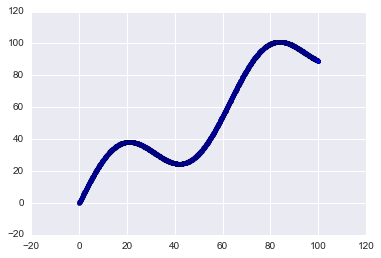

In [23]:
# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

plt.scatter(X_data, y_data)

In [24]:
# Define data size and batch size
n_samples = 1000
batch_size = 100

In [25]:
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))

In [26]:
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(n_samples, 1))
y = tf.placeholder(tf.float32, shape=(n_samples, 1))

In [27]:
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)

In [28]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)
session.run(tf.initialize_all_variables())
session.run([opt_operation], feed_dict={X: X_data, y: y_data})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


[None]

In [29]:
opt_operation = tf.train.AdamOptimizer().minimize(loss)

In [30]:
# Initialize Variables in graph
session.run(tf.initialize_all_variables())
# Do gradient descent step
_, loss_val = session.run([opt_operation, loss], feed_dict={X: X_data, y: y_data})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [31]:
loss_val

8317.6582

In [35]:
print(W.eval())

[[-0.51500112]]
